In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import wget
from sklearn import datasets # This has the Boston dataset
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from patsy import dmatrices
from IPython.display import Markdown, display

import warnings
warnings.filterwarnings('ignore')
# Reset all styles to the default:
plt.rcParams.update(plt.rcParamsDefault)
# Then make graphs inline:
%matplotlib inline

# Useful function for Jupyter to display text in bold:
def displaybd(text):
    display(Markdown("**" + text + "**"))

In [25]:
# Set custom style settings:
# NB: We need to separate "matplotlib inline" call and these settings into different
# cells, otherwise the parameters are not set. This is a bug somewhere in Jupyter
plt.rcParams['figure.figsize'] = (7, 6)
plt.rcParams['font.size'] = 24
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['lines.markersize'] = 10

print('Beginning file download with wget module')
url = 'https://raw.githubusercontent.com/wlof-2/Statistic_Machine_Learning_Course/main/data/AUS_Weather.csv'
wget.download(url, './data.csv')
dataset = pd.read_csv('./data.csv')

Beginning file download with wget module


## Dataset
For the dataset, I used the dataset in last homework, it include 56420 observations of weather information in Australia, these information are in 26 columns, I want to investigate how the maximum temperature
 in a day is affected by some weather factors, such as Humidity, atmosphere Pressure, then I will use some regression model to explain these data.

In [26]:
# dataset.info()
dataset.insert(0, 'MaxTemp', dataset.pop('MaxTemp'))

In [27]:
dataset[:10]
# dataset.info()

,MaxTemp,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,35.2,2009-01-01,Cobar,17.9,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,28.9,2009-01-02,Cobar,18.4,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,37.6,2009-01-04,Cobar,19.4,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,38.4,2009-01-05,Cobar,21.9,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,41.0,2009-01-06,Cobar,24.2,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
5,36.1,2009-01-07,Cobar,27.1,0.0,13.0,0.0,N,43.0,N,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,No
6,34.0,2009-01-08,Cobar,23.3,0.0,9.8,12.6,SSW,41.0,S,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,No
7,34.2,2009-01-09,Cobar,16.1,0.0,14.6,13.2,SE,37.0,SE,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,No
8,35.5,2009-01-10,Cobar,19.0,0.0,12.0,12.3,ENE,48.0,ENE,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,No
9,35.5,2009-01-11,Cobar,19.7,0.0,11.0,12.7,NE,41.0,NNE,...,61.0,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,No


According to our experience in our life, the temperature have correlation with many weather factors, for example the humidity, generally, the higher the air humidity, the colder the weather, and according to the assignment1, we can see a high correlation between the Humidity9am and MaxTemp, So, I ran a simple linear regression of Humidity9am on MaxTemp in a day. The output is below.

In [29]:
model = sm.OLS.from_formula('MaxTemp~Humidity9am', data=dataset)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                 1.839e+04
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:15:57   Log-Likelihood:            -1.8165e+05
No. Observations:               56420   AIC:                         3.633e+05
Df Residuals:                   56418   BIC:                         3.633e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.5161      0.094    387.647      0.000      36.331      36.701
Humidity9am    -0.1867      0.001   -135.599      0.000      -0.189      -0.184
==============================================================================
Omnibus:                     3565.223   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1368.827
Skew:                           0.110   Prob(JB):                    5.79e-298
Kurtosis:                       2.269   Cond. No.                         253.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple Linear Regression analysis
R-squared is equal to 0.246, i.e. 24.6% of the data fits this simple linear regression model, it is not very lagre, this means the Humidity in 9am in a day can't explain the maximum temperature in the day very well, but we can see the p-value is 0, so, this variable is an efficient predictor. According this linear regression,  the maximum temperature in a day will decrease about 0.187 degree for each degree increased in humidity in 9am in a day.

**All attributes of the regression result class:**

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues', 'remove_data', 'resid', 'resid_pearson', 'rsquared', 'rsquared_adj', 'save', 'scale', 'ssr', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'uncentered_tss', 'use_t', 'wald_test', 'wald_test_terms', 'wresid']


***

**Estimated coefficients:**

Intercept      36.516127
Humidity9am    -0.186673
dtype: float64


***

**Confidence intervals:**

,0,1
Intercept,36.331496,36.700758
Humidity9am,-0.189371,-0.183975


***

**Predicted values with their confidence and prediction intervals:**

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,35.582762,0.087593,35.523681,35.641843,31.499137,39.666387
1,24.009035,0.025533,23.991813,24.026257,19.925801,28.092269
2,33.716032,0.074529,33.665762,33.766301,29.632524,37.799539


***

**Linear regression fit:**

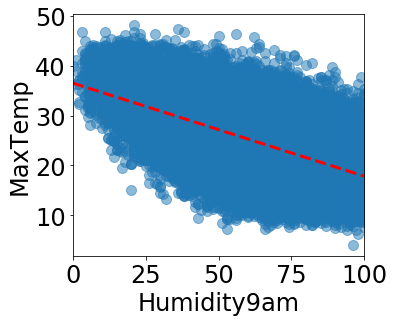

In [30]:
# PART 1.2: Different parts of the regression result object and the linear fit plot:

# The result class has a large number of attributes which can be listed using dir:
displaybd("All attributes of the regression result class:")
print(sorted([v for v in dir(res) if not v.startswith('_')]))

# We can look at the estimated coefficients:
display(Markdown("***"))
Markdown("**Estimated coefficients:**")
displaybd("Estimated coefficients:")
print(res.params)

# We can look at the 95% confidence interval for all variables:
display(Markdown("***"))
displaybd("Confidence intervals:")
# alpha is the level of the confidence interval
display(res.conf_int(alpha=0.05))

# We can predict out-of-sample MaxTemp with its 95% confidence and prediction intervals:
# Confidence intervals are mean_ci_lower and mean_ci_upper
# Prediction intevals are obs_ci_lower and obs_ci_upper
prediction = res.get_prediction(exog=dict(Humidity9am=[5, 67, 15]))
display(Markdown("***"))
displaybd("Predicted values with their confidence and prediction intervals:")
display(prediction.summary_frame(alpha=0.5))

# We can do the plot of the original data along with the fitted line:
display(Markdown("***"))
displaybd("Linear regression fit:")
fig = sm.graphics.abline_plot(model_results=res, linestyle="--", color="red", linewidth=3)
fig.set_figwidth(6)
fig.set_figheight(5)

ax = fig.axes[0]
ax.scatter(x=dataset["Humidity9am"], y=dataset["MaxTemp"], alpha=0.5)
plt.xlabel('Humidity9am')
plt.ylabel('MaxTemp')
plt.tight_layout()

According above simple linear regression

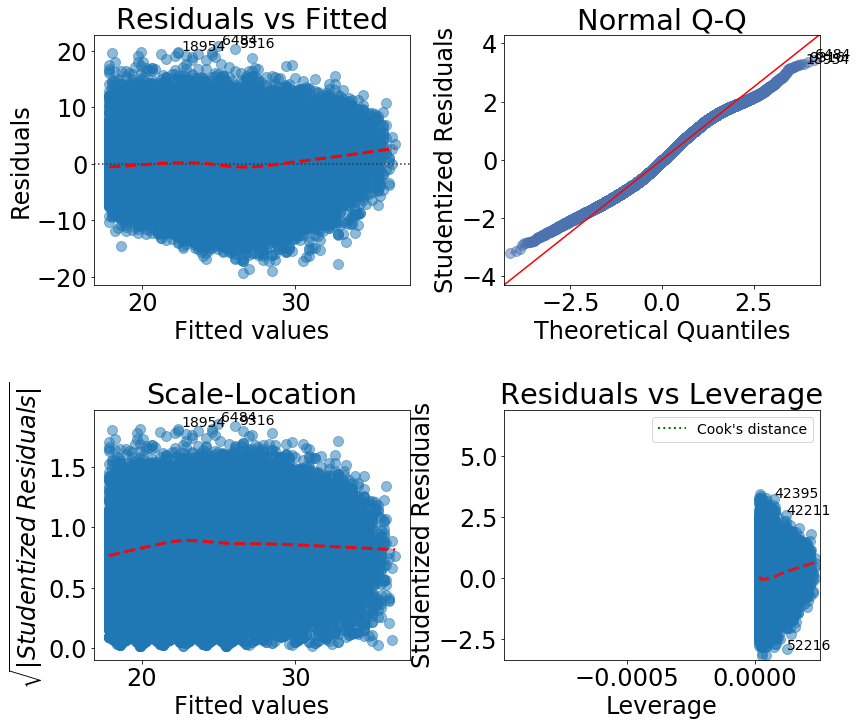

In [7]:
# PART 1.3: Diagnostic plots
# Based on https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

yhat = res.fittedvalues
ehat = res.resid
# Studentized residuals
ehatStudentized = res.get_influence().resid_studentized_internal
# Asolute squared studentized residuals
ehatStudentizedAbsSqrt = np.sqrt(np.abs(ehatStudentized))
# absolute residuals
ehatAbs = np.abs(ehat)
# leverage:
xleverage = res.get_influence().hat_matrix_diag
# Cook's distance:
modelCooks = res.get_influence().cooks_distance[0]

fig = plt.figure(figsize=[13, 11.5])
plt.subplots_adjust(wspace=0.3, hspace=0.5)

#-- RESIDUAL PLOT:

ax = fig.add_subplot(2, 2, 1)
sns.residplot(yhat, 'MaxTemp', data=dataset, lowess=True, ax=ax,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 3, 'ls': '--', 'alpha': 1.0})
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

# Annotations for the largest residuals:
yPointsTop3 = ehatAbs.sort_values(ascending=False)[:3]
for i in yPointsTop3.index:
    ax.annotate(i, xy=(1.01*yhat[i], 1.01*ehat[i]), fontsize=14);
    
#-- QQ PLOT:
# This one shows how well the distribution of residuals fit the normal distribution.
# This plots the standardized (z-score) residuals against the theoretical normal quantiles.
# Anything quite off the diagonal lines may be a concern for further investigation.

ax = fig.add_subplot(2, 2, 2)
QQ = ProbPlot(data=ehatStudentized, fit=True)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=2, ls="--", ax=ax)
ax.set_title('Normal Q-Q')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Studentized Residuals');

# Annotations for the largest residuals:
yPointsTop3 = np.flip(np.argsort(np.abs(ehatStudentized)), 0)[:3]
for r, i in enumerate(yPointsTop3):
    xy = (1.01 * np.flip(QQ.theoretical_quantiles, 0)[r], 1.01 * ehatStudentized[i])
    ax.annotate(i, xy=xy, fontsize=14);
    
#-- SCALE-LOCATION PLOT:

ax = fig.add_subplot(2, 2, 3)
plt.scatter(yhat, ehatStudentizedAbsSqrt, alpha=0.5)
sns.regplot(yhat, ehatStudentizedAbsSqrt, scatter=False, ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 3, 'ls':'--', 'alpha': 0.9},
            ax=ax)

ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Studentized\; Residuals|}$');

# Annotations for the largest residuals:
yPointsTop3 = np.flip(np.argsort(ehatStudentizedAbsSqrt), 0)[:3]
for i in yPointsTop3:
    ax.annotate(i, xy=(1.01*yhat[i], 1.01*ehatStudentizedAbsSqrt[i]), fontsize=14);

#-- LEVERAGE PLOT:
# This plot shows if any outliers have influence over the regression fit.
# Anything outside the group and outside “Cook’s Distance” lines, may have
# an influential effect on model fit.

ax = fig.add_subplot(2, 2, 4)
plt.scatter(xleverage, ehatStudentized, alpha=0.5)
sns.regplot(xleverage, ehatStudentized, scatter=False, 
            ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 3, 'ls':'--', 'alpha': 0.8},
            ax = ax);
ax.set_xlim(np.min(xleverage) - 0.001, 1.05*np.max(xleverage))
ax.set_ylim(1.05*np.min(ehatStudentized), 2*np.max(ehatStudentized))
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

# Annotations for the points with the largest Cook's distance:
yPointsTop3 = np.flip(np.argsort(modelCooks), 0)[:3]
for i in yPointsTop3:
    ax.annotate(i, xy=(1.01*xleverage[i], 1.01*ehatStudentized[i]), fontsize=14)
    
# Shenanigans for Cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=2, ls=':', color='green')

pnum = len(res.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * pnum * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * pnum * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right', fontsize=14);

## Result Analysis
1. We can see the residuals are randomly distributie on both sides of 0, this means there is no correlation between the predicted fitted values and residuals, which meet the basic assumptions of linear regression.
2. According to Normal Q-Q picture, the Studentized Residuals conforms to the normal distribution.
3. We found that the size of the residual has small fluctuations, this also comforms to our assumption that the residual is fixed
4. From the last picture, we can determine whether there are extreme data points in the dataset, When cases are outside of the Cook's distance (meaning they have high Cook's distance scores), the cases are influential to the regression results. In this picture, we can see, there are no that kind of points.

# Multiple Linear Regression

## Answer1:
I chose the MaxTemp as my outcome and Humidity9am, Humidity3pm, Cloud9am, Cloud3pm, Evaporation, Rainfall, Sunshine, WindGustSpeed, Pressure9am these nine variables as my predictors. For the reason, first of all, I think these variables are important weather information, they must have influence with the maximum temperature in a day. Although I'm not familiar with meteorology, but according the experience in our daily life, the more humid the air, the lower the temperature, and the more cloud in the sky, the lower the temperature because lack of sunshine, sunshine also have this influence, and the higher the wind speed, the lower the temperature. Also, according to geography, we know that the temperature decreases as the pressure increases, so , Pressure9m is important. But in the same day, some weather factors may change a lot, but others hardly change, for example, the humidity and cloud in a day might change a lot because of the weather change, but the pressure is more related to altitude, so, it hardly change in a day. Therefore, I choose Cloud3pm and Humidity3pm rather than Pressure3pm.

***

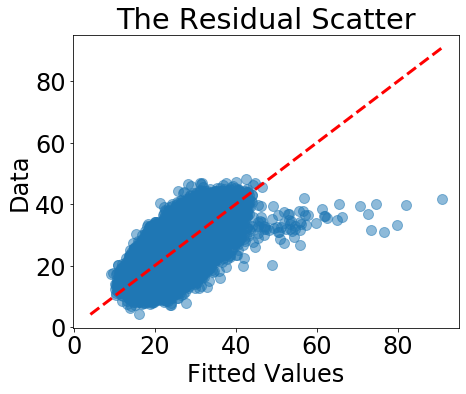

In [8]:
model = sm.OLS.from_formula('MaxTemp~Humidity9am+Humidity3pm+ Cloud3pm+Cloud9am+Evaporation+Rainfall+Sunshine+WindGustSpeed+Pressure9am', data=dataset)
res = model.fit()
display(Markdown("***"))
minval = np.min([np.min(res.fittedvalues), np.min(res.model.endog)])
maxval = np.max([np.max(res.fittedvalues), np.max(res.model.endog)])
plt.scatter(x=res.fittedvalues, y=res.model.endog, alpha=0.5)
# Draw the 45-degree line:
plt.plot([minval, maxval], [minval, maxval], linestyle="--", color="red", linewidth=3)
plt.title('The Residual Scatter')
plt.xlabel('Fitted Values')
plt.ylabel('Data')
plt.tight_layout()

## Answer2:
### (a)
 We can compare this model with the simple linear regression above, and find that Multiple Linear model is much better. The R-squared value is 0.571, which must must higher than 0.246. It shows that 57.1% of the variation in maximum temperature in a day can be explained by the independent variables chosen. Also, we use the residual scatter picture to see more information, according to this picture. It shows that this model fits the data well since most of the points are close to the diagonal 45 degree line, although there are still some data fit the model not vert well, we can see the fitted values are higher than the true data.

In [9]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     8340.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:59:31   Log-Likelihood:            -1.6574e+05
No. Observations:               56420   AIC:                         3.315e+05
Df Residuals:                   56410   BIC:                         3.316e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       334.5256      3.430     97.536      0.000     327.803     341.248
Humidity9am      -0.0355      0.002    -21.791      0.000      -0.039      -0.032
Humidity3pm      -0.0439      0.002    -29.159      0.000      -0.047      -0.041
Cloud3pm          0.1373      0.011     12.710      0.000       0.116       0.159
Cloud9am          0.0672      0.010      6.719      0.000       0.048       0.087
Evaporation       0.8051      0.007    120.484      0.000       0.792       0.818
Rainfall          0.0349      0.003     11.850      0.000       0.029       0.041
Sunshine          0.4540      0.009     51.305      0.000       0.437       0.471
WindGustSpeed    -0.1086      0.002    -66.111      0.000      -0.112      -0.105
Pressure9am      -0.3050      0.003    -91.963      0.000      -0.311      -0.298
==============================================================================
Omnibus:                     2197.471   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4424.554
Skew:                          -0.283   Prob(JB):                         0.00
Kurtosis:                       4.250   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (b)
According to the summary result of the Multiple Linear model, we can get a more specific interpretation with these variables. This picture shows that the P-values are 0 for all the predictors, this means we don’t have insignificant variables. Now we pay attention to the specific value of these estimated coefficients. “Humidity9am” and “Humiditm3pm” have nearly estimated coefficients and the value is small. according to the simple linear model, we know that this variable is meaningful, but its actual impaction on temperature is not as great as we expected. Then for “Cloud9am”, it also influences not a lot, but the result different from our expectations, the more cloud in the sky, we the less sunshine, but the maximum temperature will increase about 0.07 degree. The “Cloud3pm” influence more, about 0.14 degree. I’m not familiar with meteorology, but I think this might because the higher the surface temperature, the more moisture in the sky, and clouds will form. Then, for “Evaporation”, the higher the temperature, the more water will evaporate from the evaporating dish, so, the more water was evaporated, we can speculate that the temperature today is higher. And this index influences the temperature a lot, or to say, it has a huge influence with the temperature, because its estimated coefficient higher than some other variables, it's about 0.8. Then, for “rainfall”, the result shows that its P-value is 0, it’s meaningful, but according to the estimated coefficient, its value is not big when rainfall in millimeters, but we know, there is a big difference in rainfall between rainy and sunny days. So, actually, rainfall influence the maximum temperature lot. Then, for “sunshine” hours in a day, that is in line with common sense, the longer the sunshine, the higher the temperature, and the estimated coefficient is about 0.454, for temperature, it not small. Then for “WindGustSpeed”, the higher the wind speed, the more water will evaporate and the lower the surface temperature will be. The wind speed increases by one km/h, the temperature will drop by about 0.1 degrees. And the last one is “Pressure9am”, this estimated coefficient indicate that the Atmospheric pressure (hpa) increase one hpa, the maximum temperature will decrease about 0.3 degree.

In [10]:
#----
displaybd("Breusch-Pagan Test for Heteroskedasticity:")

# COMMENT: The resutl of the Breusch-Pagan test for heteroskedasticity is either the
# Lagrange multiplier statistics or the F-statistics. Both are valid statistics.
# We need to look at the p-values associated with them. If p-values are small, then
# we reject the null hypothesis of homoskedasticity.
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
bp_test = het_breuschpagan(res.resid, res.model.exog)
print(lzip(name, bp_test))

**Breusch-Pagan Test for Heteroskedasticity:**

[('Lagrange multiplier statistic', 7761.339837643618), ('p-value', 0.0), ('f-value', 999.7470788930225), ('f p-value', 0.0)]


### (c)
We use Breusch-Pagan Test for Heteroskedasticity, and find that the residual is heteroskedastic. Because the p-values of the Lagrange multiplier statistics and the F-statistics are equal to zero, then we reject the hypothesis that null homoskedasticity of the residual. The result is there is error term(residual) heteroskedasticity in this model.

Calculate heteroskedasticity-robust standard errors. Compare them with regular standard errors.

In [31]:
# PART 2.2: Regression with heteroskedasticity-robust standard errors
model = sm.OLS.from_formula('MaxTemp~Humidity9am+Humidity3pm+ Cloud3pm+Cloud9am+Evaporation+Rainfall+Sunshine+WindGustSpeed+Pressure9am', data=dataset)
# Using the option cov_type='HC0' will use White's heteroskedasticity-robust standard errors:
res = model.fit(cov_type='HC0')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     7432.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:16:21   Log-Likelihood:            -1.6574e+05
No. Observations:               56420   AIC:                         3.315e+05
Df Residuals:                   56410   BIC:                         3.316e+05
Df Model:                           9                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       334.5256      4.556     73.420      0.000     325.595     343.456
Humidity9am      -0.0355      0.002    -15.745      0.000      -0.040      -0.031
Humidity3pm      -0.0439      0.002    -28.028      0.000      -0.047      -0.041
Cloud3pm          0.1373      0.011     12.808      0.000       0.116       0.158
Cloud9am          0.0672      0.011      6.336      0.000       0.046       0.088
Evaporation       0.8051      0.020     40.691      0.000       0.766       0.844
Rainfall          0.0349      0.003     10.314      0.000       0.028       0.042
Sunshine          0.4540      0.010     46.770      0.000       0.435       0.473
WindGustSpeed    -0.1086      0.002    -59.228      0.000      -0.112      -0.105
Pressure9am      -0.3050      0.004    -70.242      0.000      -0.313      -0.296
==============================================================================
Omnibus:                     2197.471   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4424.554
Skew:                          -0.283   Prob(JB):                         0.00
Kurtosis:                       4.250   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (d)
Using heteroskedasticity robust standard errors show that the heteroskedasticity robust standard errors are larger than the regular ones and the differences between the two are quite obvious, I find that the very small  standard errors might also change, but it change not much, we can see the coefficient of Evaporation variable change a lot, this might because it is most important. Whereas the p-values in the new regression are still very small, with values either equal or close to zero. Then I will use the Robust Standard Error for further analysis.

In [12]:
# We can look at the 95% confidence interval for all variables:
display(Markdown("***"))
displaybd("Confidence intervals:")
# alpha is the level of the confidence interval
display(res.conf_int(alpha=0.05))

***

**Confidence intervals:**

,0,1
Intercept,325.595280,343.455869
Humidity9am,-0.039924,-0.031085
Humidity3pm,-0.047002,-0.040859
Cloud3pm,0.116331,0.158368
Cloud9am,0.046425,0.088016
Evaporation,0.766274,0.843827
Rainfall,0.028291,0.041566
Sunshine,0.434981,0.473032
WindGustSpeed,-0.112240,-0.105050
Pressure9am,-0.313496,-0.296476


### (e)
The graph above provides the 95% confidence intervals for the estimated coefficients, For each of the coefficient, I can reject the null hypothesis that H: $ \beta_j = 0 $, since the confidence intervals do not include zero.

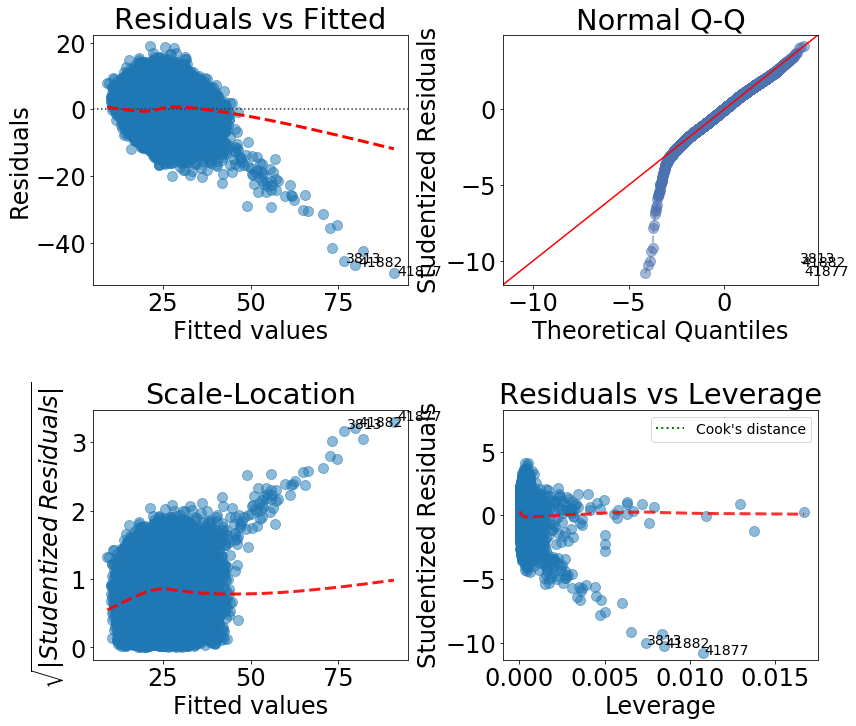

In [13]:
# PART 1.3: Diagnostic plots
# Based on https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

yhat = res.fittedvalues
ehat = res.resid
# Studentized residuals
ehatStudentized = res.get_influence().resid_studentized_internal
# Asolute squared studentized residuals
ehatStudentizedAbsSqrt = np.sqrt(np.abs(ehatStudentized))
# absolute residuals
ehatAbs = np.abs(ehat)
# leverage:
xleverage = res.get_influence().hat_matrix_diag
# Cook's distance:
modelCooks = res.get_influence().cooks_distance[0]

fig = plt.figure(figsize=[13, 11.5])
plt.subplots_adjust(wspace=0.3, hspace=0.5)

#-- RESIDUAL PLOT:

ax = fig.add_subplot(2, 2, 1)
sns.residplot(yhat, 'MaxTemp', data=dataset, lowess=True, ax=ax,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 3, 'ls': '--', 'alpha': 1.0})
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

# Annotations for the largest residuals:
yPointsTop3 = ehatAbs.sort_values(ascending=False)[:3]
for i in yPointsTop3.index:
    ax.annotate(i, xy=(1.01*yhat[i], 1.01*ehat[i]), fontsize=14);
    
#-- QQ PLOT:
# This one shows how well the distribution of residuals fit the normal distribution.
# This plots the standardized (z-score) residuals against the theoretical normal quantiles.
# Anything quite off the diagonal lines may be a concern for further investigation.

ax = fig.add_subplot(2, 2, 2)
QQ = ProbPlot(data=ehatStudentized, fit=True)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=2, ls="--", ax=ax)
ax.set_title('Normal Q-Q')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Studentized Residuals');

# Annotations for the largest residuals:
yPointsTop3 = np.flip(np.argsort(np.abs(ehatStudentized)), 0)[:3]
for r, i in enumerate(yPointsTop3):
    xy = (1.01 * np.flip(QQ.theoretical_quantiles, 0)[r], 1.01 * ehatStudentized[i])
    ax.annotate(i, xy=xy, fontsize=14);
    
#-- SCALE-LOCATION PLOT:

ax = fig.add_subplot(2, 2, 3)
plt.scatter(yhat, ehatStudentizedAbsSqrt, alpha=0.5)
sns.regplot(yhat, ehatStudentizedAbsSqrt, scatter=False, ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 3, 'ls':'--', 'alpha': 0.9},
            ax=ax)

ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Studentized\; Residuals|}$');

# Annotations for the largest residuals:
yPointsTop3 = np.flip(np.argsort(ehatStudentizedAbsSqrt), 0)[:3]
for i in yPointsTop3:
    ax.annotate(i, xy=(1.01*yhat[i], 1.01*ehatStudentizedAbsSqrt[i]), fontsize=14);

#-- LEVERAGE PLOT:
# This plot shows if any outliers have influence over the regression fit.
# Anything outside the group and outside “Cook’s Distance” lines, may have
# an influential effect on model fit.

ax = fig.add_subplot(2, 2, 4)
plt.scatter(xleverage, ehatStudentized, alpha=0.5)
sns.regplot(xleverage, ehatStudentized, scatter=False, 
            ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 3, 'ls':'--', 'alpha': 0.8},
            ax = ax);
ax.set_xlim(np.min(xleverage) - 0.001, 1.05*np.max(xleverage))
ax.set_ylim(1.05*np.min(ehatStudentized), 2*np.max(ehatStudentized))
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

# Annotations for the points with the largest Cook's distance:
yPointsTop3 = np.flip(np.argsort(modelCooks), 0)[:3]
for i in yPointsTop3:
    ax.annotate(i, xy=(1.01*xleverage[i], 1.01*ehatStudentized[i]), fontsize=14)
    
# Shenanigans for Cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=2, ls=':', color='green')

pnum = len(res.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * pnum * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * pnum * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right', fontsize=14);

In [20]:
dataset.iloc[[41877,41888, 3813], :]

,MaxTemp,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
41877,41.7,2010-01-09,Woomera,26.6,0.0,81.2,13.2,N,48.0,NE,...,22.0,10.0,1013.9,1011.9,0.0,4.0,33.6,40.3,No,No
41888,39.7,2010-02-08,Woomera,25.7,0.0,72.2,13.0,SE,50.0,E,...,26.0,18.0,1016.3,1013.6,1.0,4.0,31.2,37.9,No,No
3813,31.0,2016-03-23,Moree,14.3,5.8,65.4,11.2,SSE,31.0,E,...,58.0,23.0,1016.9,1014.5,1.0,4.0,21.5,29.2,Yes,No


In [22]:
dataset[41877:41888]

,MaxTemp,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
41877,41.7,2010-01-09,Woomera,26.6,0.0,81.2,13.2,N,48.0,NE,...,22.0,10.0,1013.9,1011.9,0.0,4.0,33.6,40.3,No,No
41878,31.7,2010-01-14,Woomera,16.3,0.0,63.0,13.2,SSE,48.0,SE,...,46.0,17.0,1018.2,1015.5,0.0,1.0,20.5,29.5,No,No
41879,36.5,2010-01-15,Woomera,18.5,0.0,17.4,13.3,WSW,44.0,ESE,...,42.0,8.0,1014.7,1011.1,1.0,1.0,24.1,35.4,No,No
41880,34.5,2010-01-16,Woomera,21.8,0.0,10.0,13.3,SSW,76.0,SSW,...,27.0,9.0,1012.4,1011.5,1.0,1.0,25.7,33.6,No,No
41881,27.9,2010-01-17,Woomera,15.5,0.0,18.8,13.1,S,65.0,S,...,50.0,23.0,1018.3,1016.1,1.0,1.0,18.2,25.8,No,No
41882,33.1,2010-01-23,Woomera,17.0,0.0,70.0,11.7,S,48.0,SSE,...,55.0,17.0,1013.9,1011.2,0.0,5.0,19.7,31.0,No,No
41883,40.0,2010-01-27,Woomera,25.9,0.0,54.8,7.5,S,76.0,ESE,...,22.0,13.0,1010.1,1008.6,3.0,7.0,30.7,38.6,No,No
41884,39.9,2010-01-31,Woomera,24.9,0.0,59.8,13.0,SE,59.0,SE,...,18.0,9.0,1006.9,1006.2,1.0,3.0,30.2,38.4,No,No
41885,36.0,2010-02-01,Woomera,18.7,0.0,20.4,12.8,SE,54.0,SSE,...,58.0,25.0,1011.7,1008.3,1.0,1.0,21.2,33.1,No,No
41886,29.7,2010-02-02,Woomera,21.1,0.0,15.6,2.6,ENE,46.0,NNE,...,54.0,34.0,1009.8,1008.7,8.0,8.0,25.3,28.6,No,No


### (f)
The second Figure above shows a Normal Q-Q plot, with the top three observations with highest studentized residuals annotated with numbers of observations next to them. I think they are quite obvious outliers because they are far from other data points. And what's more, I think these points more than three. This phenomenon occurs because extreme weather. We can see the observations 41877 and 41888, and compare these observations with other days, and find that, there are happened in extreme weather, it's very very hot. And this kind of extreme weather is possible in our life, and this kind of weather is extremely unstable, so, we cloud also see, with the increase of the MaxTemp in fitted value, the studentized residuals still increase also we use Robust Standard Error. But I think these observations are meaningful rather than incorrect data entry process, because the extreme weather. For the observation 3813, it also in extreme weather, because it was rainy that day, but the maximum temp much higher than other rainy day. 

### (g)
The above polt shows a Residual vs Leverage plot, with the top three observations with highest leverage annotated, and compare with the normal observations. And the top three observations with highest leverage are the same points as the top three observations with highest studentized residuals, with the analysis above, we can conclude that these points are also meaningful rather than incorrect data entry process.

Checking the collinearity between the regressors by looking at their variane inflation factors

In [26]:
# PART 2.4: Variance Inflation Factors (VIF)
# Get Y and X dataframes based on the full regression:
# NB: We need to explicitly include the constant here:
Y, X = dmatrices('MaxTemp ~ ' + 'Humidity3pm+Humidity9am+Cloud3pm+Cloud9am+Evaporation+Rainfall+Sunshine+WindGustSpeed+Pressure9am', data=dataset, return_type='dataframe')
# Calculate VIFs for all columns:
vif = pd.DataFrame()
# We don't calculate VIF for the column with index '0', because this is the Intercept column:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif["features"] = X.columns[1:]
vif.round(2)

,VIF Factor,features
0,2.51,Humidity3pm
1,2.46,Humidity9am
2,2.21,Cloud3pm
3,2.12,Cloud9am
4,1.65,Evaporation
5,1.16,Rainfall
6,2.99,Sunshine
7,1.30,WindGustSpeed
8,1.42,Pressure9am


### (h)
We find that, although we use both humidity 9am and 3pm in a day, and use both cloud 9am and 3pm in a day the VIF Facotr are not bigger than 5, this is because the weather change a lot in day, so , there is no regressors "highly" correlated with other regressors.

In [49]:
# We can predict out-of-sample MaxTemp with its 95% confidence and prediction intervals:
# Confidence intervals are mean_ci_lower and mean_ci_upper
# Prediction intevals are obs_ci_lower and obs_ci_upper
prediction = res.get_prediction(exog=dict([("Humidity3pm",34.0), ("Humidity9am" ,68.0), ("Cloud3pm",5), ("Cloud9am",2), ("Evaporation",13.5), ("Rainfall",7.5), ("Sunshine" ,4.5), ("WindGustSpeed",76.7),("Pressure9am",1016.3)]))
display(Markdown("***"))
displaybd("Predicted values with their confidence and prediction intervals:")
display(prediction.summary_frame(alpha=0.5))

***

**Predicted values with their confidence and prediction intervals:**

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,26.32196,0.199704,26.187262,26.456658,23.239035,29.404886


### (i)
Finally, let' s predict the maxmium temperature for an observation not in the dataset using the estimated model. The result is showed above, we use a rainy day observation, with Humidity3pm is 34.0, Humidity9am is 68.0, Cloud3pm is 5, Cloud9am is 2, Evaporation is 13.5, Rainfall is 7.5mm, Sunshine hour is 4.5 hours, WindGustSpeed is 76.7 km/h, Pressure9am is 1016.3 hpa, and the predicted result is about 26, this maxmium temperature is fit a spring or a summer rainy day. The result is similar to the true data.

# Log-linear model

In this section, I am going to run a log-linear regression, I will take log of the outcome, WindGustSpeed and Pressure9am, because the WindGustSpeed are Pressure9am are bigger than other number in the regressors, for thr humidity9am and Humidity3pm and Evaporation, their size and temperature are almost, so, I also take log of them, but there some zero numbers in them, we find that, there are 131 observarions have the zero number, they will be infinity after take log, so, we replace these inf with -1, and get new dataset.

In [4]:
# take log of outcome and some regressors, Sunshine and Rainfall and Cloud could not take log because of 0.
new_data = dataset[['MaxTemp' ,'Humidity9am', 'Humidity3pm', 'Evaporation', 'WindGustSpeed', 'Pressure9am']].apply(np.log)
new_data.insert(1, 'Sunshine', dataset[['Sunshine']])
new_data.insert(1, 'Rainfall', dataset[['Rainfall']])
new_data.insert(1, 'Cloud3pm', dataset[['Cloud3pm']])
new_data.insert(1, 'Cloud9am', dataset[['Cloud9am']])
print(new_data.index[np.isinf(new_data).any(1)].shape)
new_data['Humidity9am'][np.isinf(new_data['Humidity9am'])] = -1
new_data['Humidity3pm'][np.isinf(new_data['Humidity3pm'])] = -1
new_data['Evaporation'][np.isinf(new_data['Evaporation'])] = -1


(131,)


new_data[146:147]

***

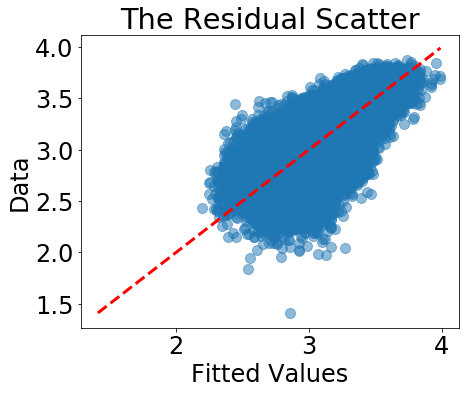

In [5]:
# PART 3.1: Regression 
model = sm.OLS.from_formula('MaxTemp~Humidity9am+Humidity3pm+ Cloud3pm+Cloud9am+Evaporation+Rainfall+Sunshine+WindGustSpeed+Pressure9am', data=new_data)
res = model.fit()
display(Markdown("***"))
minval = np.min([np.min(res.fittedvalues), np.min(res.model.endog)])
maxval = np.max([np.max(res.fittedvalues), np.max(res.model.endog)])
plt.scatter(x=res.fittedvalues, y=res.model.endog, alpha=0.5)
# Draw the 45-degree line:
plt.plot([minval, maxval], [minval, maxval], linestyle="--", color="red", linewidth=3)
plt.title('The Residual Scatter')
plt.xlabel('Fitted Values')
plt.ylabel('Data')
plt.tight_layout()

## Answer3:
### (a)
 We can compare this model with the multiple linear regression above, and find that log Linear model get the R-squared of this model is 0.576, This can be checked by looking at the above residual scatter, it's a little better than the multiple linear regression without take log. 

In [6]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     8530.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:37:16   Log-Likelihood:                 11425.
No. Observations:               56420   AIC:                        -2.283e+04
Df Residuals:                   56410   BIC:                        -2.274e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        80.8661      1.008     80.215      0.000      78.890      82.842
Humidity9am      -0.0204      0.004     -5.470      0.000      -0.028      -0.013
Humidity3pm      -0.0918      0.003    -35.370      0.000      -0.097      -0.087
Cloud3pm          0.0047      0.000     10.024      0.000       0.004       0.006
Cloud9am          0.0031      0.000      7.251      0.000       0.002       0.004
Evaporation       0.1922      0.001    140.992      0.000       0.189       0.195
Rainfall          0.0016      0.000     12.449      0.000       0.001       0.002
Sunshine          0.0190      0.000     50.117      0.000       0.018       0.020
WindGustSpeed    -0.1877      0.003    -63.796      0.000      -0.193      -0.182
Pressure9am     -11.1293      0.145    -76.797      0.000     -11.413     -10.845
==============================================================================
Omnibus:                     2314.142   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2971.434
Skew:                          -0.439   Prob(JB):                         0.00
Kurtosis:                       3.701   Cond. No.                     1.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (b)
Now I’m going to interpret the estimated coefficients, the sign of the coefficients don't change, and all the P-value are still zero, this means all variables are meaningful, we can see most coefficients have little change, for example, humidity and rainfall, which are small in Section 2, they are still very small, and don't influence the maximum temperature lot, compare with the evaporation, the wight of Sunshine decrease, the WindSpeed coefficient increase. The most obvious changed coefficient is Pressure9am, we know, it's number is very big compare with others, after take log, it's coefficient become much bigger than others. For these coefficients interpretation, They can be explained by the same logic as before, so I omit the interpretation here.

In [11]:
#----
displaybd("Breusch-Pagan Test for Heteroskedasticity:")

# COMMENT: The resutl of the Breusch-Pagan test for heteroskedasticity is either the
# Lagrange multiplier statistics or the F-statistics. Both are valid statistics.
# We need to look at the p-values associated with them. If p-values are small, then
# we reject the null hypothesis of homoskedasticity.
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
bp_test = het_breuschpagan(res.resid, res.model.exog)
print(lzip(name, bp_test))

**Breusch-Pagan Test for Heteroskedasticity:**

[('Lagrange multiplier statistic', 6688.141512390524), ('p-value', 0.0), ('f-value', 842.9161109359818), ('f p-value', 0.0)]


### (c)
We use Breusch-Pagan Test for Heteroskedasticity, and find that the residual is still heteroskedastic. Because the p-values of the Lagrange multiplier statistics and the F-statistics are equal to zero, then we reject the hypothesis that null homoskedasticity of the residual. The result is there is error term(residual) heteroskedasticity in this model.

In [7]:
# PART 2.2: Regression with heteroskedasticity-robust standard errors
model = sm.OLS.from_formula('MaxTemp~Humidity9am+Humidity3pm+ Cloud3pm+Cloud9am+Evaporation+Rainfall+Sunshine+WindGustSpeed+Pressure9am', data=new_data)
# Using the option cov_type='HC0' will use White's heteroskedasticity-robust standard errors:
res = model.fit(cov_type='HC0')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     8972.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:37:21   Log-Likelihood:                 11425.
No. Observations:               56420   AIC:                        -2.283e+04
Df Residuals:                   56410   BIC:                        -2.274e+04
Df Model:                           9                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        80.8661      1.206     67.044      0.000      78.502      83.230
Humidity9am      -0.0204      0.003     -6.009      0.000      -0.027      -0.014
Humidity3pm      -0.0918      0.002    -39.175      0.000      -0.096      -0.087
Cloud3pm          0.0047      0.000     10.369      0.000       0.004       0.006
Cloud9am          0.0031      0.000      7.264      0.000       0.002       0.004
Evaporation       0.1922      0.002    115.371      0.000       0.189       0.195
Rainfall          0.0016      0.000     10.724      0.000       0.001       0.002
Sunshine          0.0190      0.000     47.529      0.000       0.018       0.020
WindGustSpeed    -0.1877      0.003    -59.658      0.000      -0.194      -0.181
Pressure9am     -11.1293      0.174    -64.091      0.000     -11.470     -10.789
==============================================================================
Omnibus:                     2314.142   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2971.434
Skew:                          -0.439   Prob(JB):                         0.00
Kurtosis:                       3.701   Cond. No.                     1.73e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (d)
Then I ran the regression using the heteroskedasticity-robust standard errors. The output is shown above. We can see that the robust standard errors did not change much compared to the regular ones.For some very small number, there are even unchanged. Different from the multiple linear regression without taking log, the intercept and pressure have little change.

***

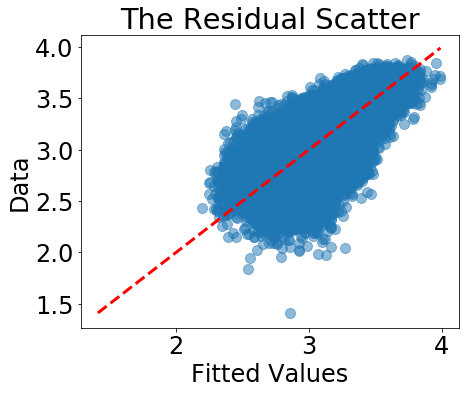

In [8]:
display(Markdown("***"))
minval = np.min([np.min(res.fittedvalues), np.min(res.model.endog)])
maxval = np.max([np.max(res.fittedvalues), np.max(res.model.endog)])
plt.scatter(x=res.fittedvalues, y=res.model.endog, alpha=0.5)
# Draw the 45-degree line:
plt.plot([minval, maxval], [minval, maxval], linestyle="--", color="red", linewidth=3)
plt.title('The Residual Scatter')
plt.xlabel('Fitted Values')
plt.ylabel('Data')
plt.tight_layout()

In [9]:
# We can look at the 95% confidence interval for all variables:
display(Markdown("***"))
displaybd("Confidence intervals:")
# alpha is the level of the confidence interval
display(res.conf_int(alpha=0.05))

***

**Confidence intervals:**

,0,1
Intercept,78.502011,83.230112
Humidity9am,-0.027009,-0.013723
Humidity3pm,-0.096352,-0.087171
Cloud3pm,0.003796,0.005566
Cloud9am,0.002289,0.003981
Evaporation,0.188901,0.195430
Rainfall,0.001283,0.001857
Sunshine,0.018217,0.019784
WindGustSpeed,-0.193827,-0.181496
Pressure9am,-11.469637,-10.788945


### (e)
The table above gives the 95% confidence intervals for each estimated coefficient. There is not zero in the confidence coefficient, therefore we can reject the null hypothesis **H0**: $\beta_i= 0$ for all coefficients.

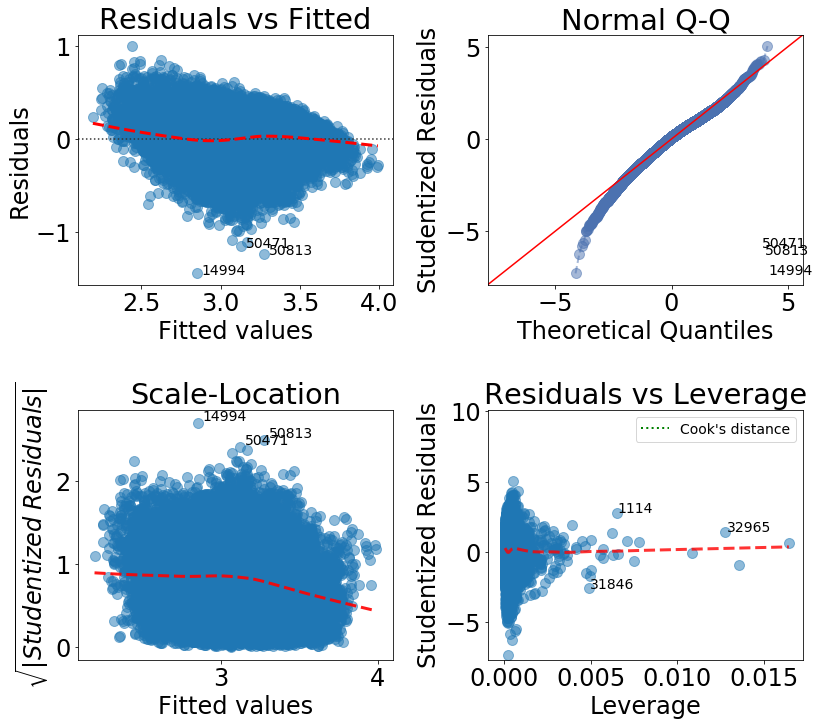

In [10]:
# PART 1.3: Diagnostic plots
# Based on https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

yhat = res.fittedvalues
ehat = res.resid
# Studentized residuals
ehatStudentized = res.get_influence().resid_studentized_internal
# Asolute squared studentized residuals
ehatStudentizedAbsSqrt = np.sqrt(np.abs(ehatStudentized))
# absolute residuals
ehatAbs = np.abs(ehat)
# leverage:
xleverage = res.get_influence().hat_matrix_diag
# Cook's distance:
modelCooks = res.get_influence().cooks_distance[0]

fig = plt.figure(figsize=[13, 11.5])
plt.subplots_adjust(wspace=0.3, hspace=0.5)

#-- RESIDUAL PLOT:

ax = fig.add_subplot(2, 2, 1)
sns.residplot(yhat, 'MaxTemp', data=new_data, lowess=True, ax=ax,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 3, 'ls': '--', 'alpha': 1.0})
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

# Annotations for the largest residuals:
yPointsTop3 = ehatAbs.sort_values(ascending=False)[:3]
for i in yPointsTop3.index:
    ax.annotate(i, xy=(1.01*yhat[i], 1.01*ehat[i]), fontsize=14);
    
#-- QQ PLOT:
# This one shows how well the distribution of residuals fit the normal distribution.
# This plots the standardized (z-score) residuals against the theoretical normal quantiles.
# Anything quite off the diagonal lines may be a concern for further investigation.

ax = fig.add_subplot(2, 2, 2)
QQ = ProbPlot(data=ehatStudentized, fit=True)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=2, ls="--", ax=ax)
ax.set_title('Normal Q-Q')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Studentized Residuals');

# Annotations for the largest residuals:
yPointsTop3 = np.flip(np.argsort(np.abs(ehatStudentized)), 0)[:3]
for r, i in enumerate(yPointsTop3):
    xy = (1.01 * np.flip(QQ.theoretical_quantiles, 0)[r], 1.01 * ehatStudentized[i])
    ax.annotate(i, xy=xy, fontsize=14);
    
#-- SCALE-LOCATION PLOT:

ax = fig.add_subplot(2, 2, 3)
plt.scatter(yhat, ehatStudentizedAbsSqrt, alpha=0.5)
sns.regplot(yhat, ehatStudentizedAbsSqrt, scatter=False, ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 3, 'ls':'--', 'alpha': 0.9},
            ax=ax)

ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Studentized\; Residuals|}$');

# Annotations for the largest residuals:
yPointsTop3 = np.flip(np.argsort(ehatStudentizedAbsSqrt), 0)[:3]
for i in yPointsTop3:
    ax.annotate(i, xy=(1.01*yhat[i], 1.01*ehatStudentizedAbsSqrt[i]), fontsize=14);

#-- LEVERAGE PLOT:
# This plot shows if any outliers have influence over the regression fit.
# Anything outside the group and outside “Cook’s Distance” lines, may have
# an influential effect on model fit.

ax = fig.add_subplot(2, 2, 4)
plt.scatter(xleverage, ehatStudentized, alpha=0.5)
sns.regplot(xleverage, ehatStudentized, scatter=False, 
            ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 3, 'ls':'--', 'alpha': 0.8},
            ax = ax);
ax.set_xlim(np.min(xleverage) - 0.001, 1.05*np.max(xleverage))
ax.set_ylim(1.05*np.min(ehatStudentized), 2*np.max(ehatStudentized))
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

# Annotations for the points with the largest Cook's distance:
yPointsTop3 = np.flip(np.argsort(modelCooks), 0)[:3]
for i in yPointsTop3:
    ax.annotate(i, xy=(1.01*xleverage[i], 1.01*ehatStudentized[i]), fontsize=14)
    
# Shenanigans for Cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=2, ls=':', color='green')

pnum = len(res.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * pnum * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * pnum * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right', fontsize=14);

In [12]:
dataset.iloc[[50471,50813, 14994], :]

,MaxTemp,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
50471,7.2,2015-08-03,Hobart,1.0,9.0,4.0,4.3,WSW,63.0,W,...,53.0,76.0,999.8,1007.7,2.0,5.0,4.5,4.8,Yes,Yes
50813,7.7,2016-07-23,Hobart,3.7,7.6,3.8,3.8,WSW,65.0,WSW,...,67.0,66.0,987.2,993.3,7.0,7.0,4.7,4.8,Yes,Yes
14994,4.1,2009-06-12,Canberra,-2.2,0.2,1.8,0.0,WNW,17.0,E,...,96.0,84.0,1025.3,1022.4,8.0,8.0,0.7,3.7,No,No


### (f)
The second Figure above shows a Normal Q-Q plot, with the top three observations with highest studentized residuals annotated with numbers of observations next to them. Compared with multiple linear regression without take log, I think observation No.50471 and No.50813 are not obvious outliers because they are more near to other data points. But for 14994,  if far from other data points much, so, I think it is an outlier. And I think this point might in a very very cold place, the weather sometimes is extreme weather. 

In [13]:
dataset.iloc[[1114,31846, 32965], :]

,MaxTemp,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1114,19.5,2010-10-04,CoffsHarbour,16.2,128.0,0.2,0.0,SE,61.0,ESE,...,93.0,92.0,1021.2,1018.1,8.0,8.0,18.2,18.9,Yes,Yes
31846,20.5,2016-06-20,Brisbane,15.8,110.6,7.2,9.8,W,37.0,WNW,...,56.0,49.0,1010.0,1008.2,1.0,5.0,18.3,19.7,Yes,No
32965,28.8,2011-02-25,Cairns,23.4,183.0,1.0,0.0,S,33.0,S,...,98.0,87.0,1009.2,1006.4,8.0,8.0,23.5,26.5,Yes,Yes


### (g)
The last Figure above shows a Residuals-Leverage plot, The three observations have a very high Rainfall and  humidity, these days are in heavy rain, but I think these points are meanfuling, in tropical rainforest areas with lower dimensions, such extreme weather will occur, with high temperatures but heavy rain.

In [14]:
Y, X = dmatrices('MaxTemp ~ ' + 'Humidity3pm+Humidity9am+Cloud3pm+Cloud9am+Evaporation+Rainfall+Sunshine+WindGustSpeed+Pressure9am', data=new_data, return_type='dataframe')
# Calculate VIFs for all columns:
vif = pd.DataFrame()
# We don't calculate VIF for the column with index '0', because this is the Intercept column:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif["features"] = X.columns[1:]
vif.round(2)

,VIF Factor,features
0,2.77,Humidity3pm
1,2.70,Humidity9am
2,2.21,Cloud3pm
3,2.11,Cloud9am
4,1.63,Evaporation
5,1.13,Rainfall
6,2.93,Sunshine
7,1.29,WindGustSpeed
8,1.40,Pressure9am


### (h)
VIF of each feature is shown above, we can see, after taking log of some regressors, the VIF Facotrs are still not bigger than 5, this is because the weather change a lot in day, so , there is no regressors "highly" correlated with other regressors.

In [23]:
prediction = res.get_prediction(exog=dict([("Humidity3pm",5.0), ("Humidity9am" ,6.0), ("Cloud3pm",5), ("Cloud9am",2), ("Evaporation",3.75), ("Rainfall",7.5), ("Sunshine" ,4.5), ("WindGustSpeed",6.26),("Pressure9am",9.99)]))
display(Markdown("***"))
displaybd("Predicted values with their confidence and prediction intervals:")
display(prediction.summary_frame(alpha=0.5))

***

**Predicted values with their confidence and prediction intervals:**

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-31.223743,0.534575,-31.584309,-30.863178,-31.608161,-30.839326


### (i)
Finally, let' s predict the maxmium temperature for an observation not in the dataset using the estimated model. The result is showed above, we use a rainy day observation, with the data the same as Section but with log of some inputs. And we get the result above.